In [1]:
%matplotlib inline

### Scikitlearn review

In [2]:
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn.score(X_test,y_test)

0.6758571933545422

### Logistic regression and SVM Intro

SVM = support vector machine

In [3]:
from sklearn.linear_model import LogisticRegression

wine = sklearn.datasets.load_wine()

lr = LogisticRegression()
lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)

0.9719101123595506

In [4]:
lr.predict_proba(wine.data[:1])

array([[9.95108707e-01, 4.35737901e-03, 5.33913921e-04]])

In [5]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

0.9269662921348315

non-linear SVC

In [6]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

1.0

In [8]:
digits = sklearn.datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
print(lr.score(Xtrain,ytrain))
print(lr.score(Xtest,ytest))

# Apply SVM and print scores
svm = SVC()
svm.fit(Xtrain,ytrain)
print(svm.score(Xtrain,ytrain))
print(svm.score(Xtest,ytest))

0.9977728285077951
0.9644444444444444
1.0
0.5133333333333333


Looks like overfitting in SVC

### Linear Classifiers:

raw model output=coefficients⋅features+intercept

Linear classifier prediction: compute raw model output, check the sign, (pos. means one class, neg. means the other)

The sign tells you which side of the decision boundary you're on.

### Loss Functions:

ex: scikit learn's LinearRegression minimizes with least squares

Loss function is a penalty score that tells us how well/poorly the model is doing on the training data.

Score function is not necessarily the same as the loss function.

Squared loss functions are not appropriate for classification problems.  A natural loss function is the number of errors (called 0-1 loss), but it's hard to minimize.

Logistic loss is a "smooth" version of the 0-1 loss that can easily be minimized in practice.

Another option is hinge loss.

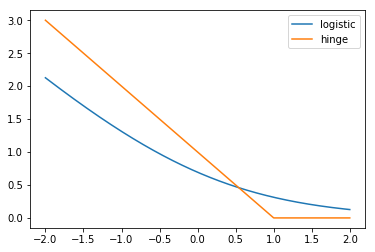

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

### Regularization

regularized loss = original loss + large coefficient penalty

Coefficient 'C': Large C means weak regularization, small C means strong regularization.

Too weak regularization can lead to overfitting. More regularization always means lower training accuracy but (almost always) higher test accuracy.

Too strong regularization leads to underfitting (by definition)

Ridge (L2) regularization: default -- sets coefficients to be smaller

Lasso (L1) regularization: performs feature selection, setting some coefficients to zero.

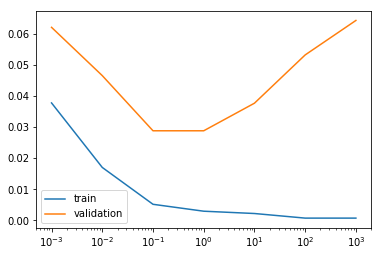

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

train_errs = []
valid_errs = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train,y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 243


Extracting the probabilities with predict_proba

label = 0, prediction = 0, proba= 1.00


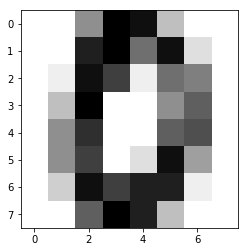

label = 4, prediction = 4, proba= 0.39


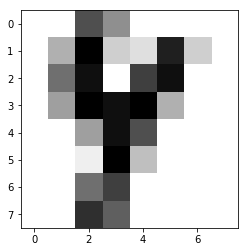

In [23]:
lr = LogisticRegression()
X = digits.data
y = digits.target
lr.fit(X,y)

y_pred = lr.predict(X)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

print('label = %i, prediction = %i, proba= %.2f' % (y[proba_inds[-1]], y_pred[proba_inds[-1]], proba[proba_inds[-1]][y_pred[proba_inds[-1]]]))
plt.imshow(digits.images[proba_inds[-1]], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print('label = %i, prediction = %i, proba= %.2f' % (y[proba_inds[0]], y_pred[proba_inds[0]], proba[proba_inds[0]][y_pred[proba_inds[0]]]))
plt.imshow(digits.images[proba_inds[0]], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Multi-class logistic regression

One-vs-rest versus "Multinomial" or "softmax":
- OVR fits a binary classifier for each class, whereas softmax fits a single classifier for all classes
- OVR doesn't directly optimize accuracy
- OVR common for Logistic Regression, SVMs, softmax standard for neural networks

In [25]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9955456570155902
OVR test accuracy    : 0.9644444444444444
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9666666666666667


### SVMs

Support vector: a training example that is incorrectly classified or is close to the boundary. That is, it is not on the flat portion of the loss function.

Removing all other examples that are not support vectors should not change the boundary (because they have no loss).

Kernel SVMs: default kernel is "RBF" with hyperparameter "gamma" which makes the boundary smoother.  But if you make the gamma too high, you get overfitting.

In [26]:
X = digits.data
y = digits.target

svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X,y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train,y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test,y_test))

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.9866369710467706
Test accuracy of best grid search hypers: 0.9933333333333333


### Comparing Logistic Regression and SVM

- Both linear classifiers.
- SVM better for using kernels (gamma)
- LogReg better for outputting meaningful probabilities
- For LogReg, all data points affect the fit, for SVM only support vectors affect the fit.
- SVM by convention is always L2 regularization.

Another option: SGDClassifier, which scales well to large datasets (with hyperparameter alpha like 1/C)

In [29]:
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0, max_iter=5, tol=None)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'}
Best CV accuracy 0.949517446176689
Test accuracy of best grid search hypers: 0.96
